### Edge detection filter

<function matplotlib.pyplot.show(close=None, block=None)>

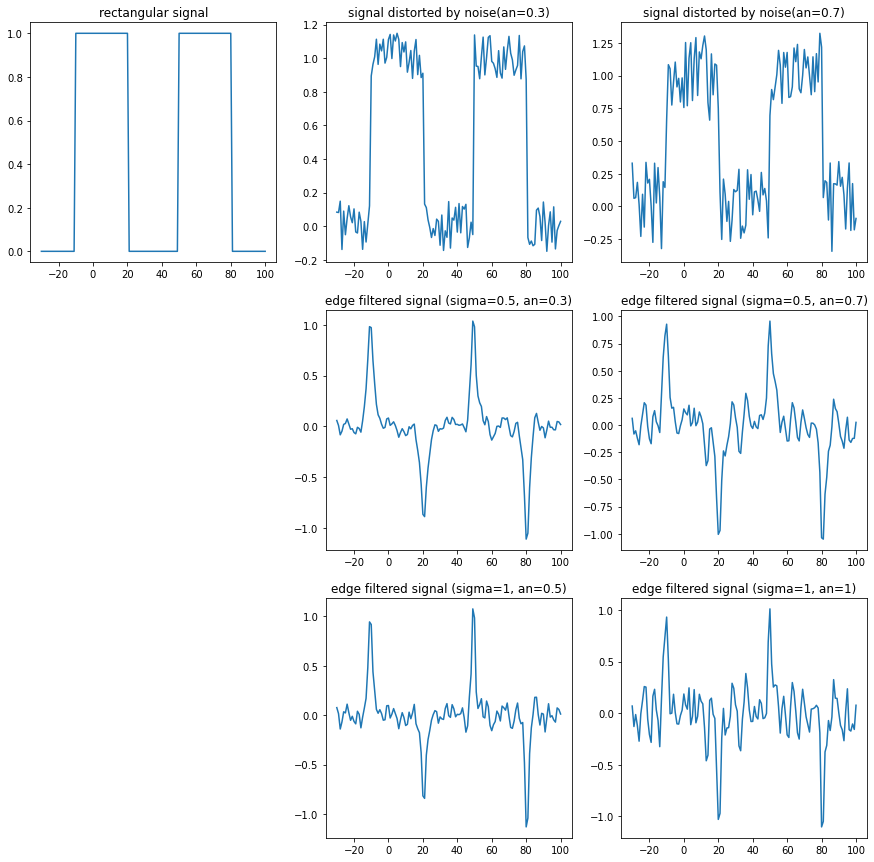

In [30]:
import numpy as np
import matplotlib.pyplot as plt

#range of the signal
n = np.linspace(-30,100,131)

#define the signal
x = np.zeros(131)
for i in range(131):
    if n[i] >= -10 and n[i] <= 20:
        x[i] = 1
    elif n[i] >= 50 and n[i] <= 80:
        x[i] = 1

#define noise
def noise(an):
    return an*(np.random.rand(131)-0.5)

#edge filter 
def edge(signal,sigma,L=6):
    h = np.exp(-sigma*abs(np.arange(-L,L+1,1)))
    h[L] = 0
    h[0:L] *= -1
    h *=  1/(sum(h[0:L]))
    return np.convolve(h,signal,'same')

x1 = x + noise(0.3)
x2 = x + noise(0.7)

plt.figure(num=1,figsize=(15,15))

plt.subplot(3,3,1)
plt.title("rectangular signal")
plt.plot(n,x)

plt.subplot(3,3,2)
plt.title("signal distorted by noise(an=0.3)")
plt.plot(n, x1)

plt.subplot(3,3,3)
plt.title("signal distorted by noise(an=0.7)")
plt.plot(n, x2)

plt.subplot(3,3,5)
plt.title("edge filtered signal (sigma=0.5, an=0.3)")
plt.plot(n,edge(x1,0.5))

plt.subplot(3,3,6)
plt.title("edge filtered signal (sigma=0.5, an=0.7)")
plt.plot(n,edge(x2,0.5))

plt.subplot(3,3,8)
plt.title("edge filtered signal (sigma=1, an=0.5)")
plt.plot(n,edge(x1,1))

plt.subplot(3,3,9)
plt.title("edge filtered signal (sigma=1, an=1)")
plt.plot(n,edge(x2,1))

plt.show

### smooth filter

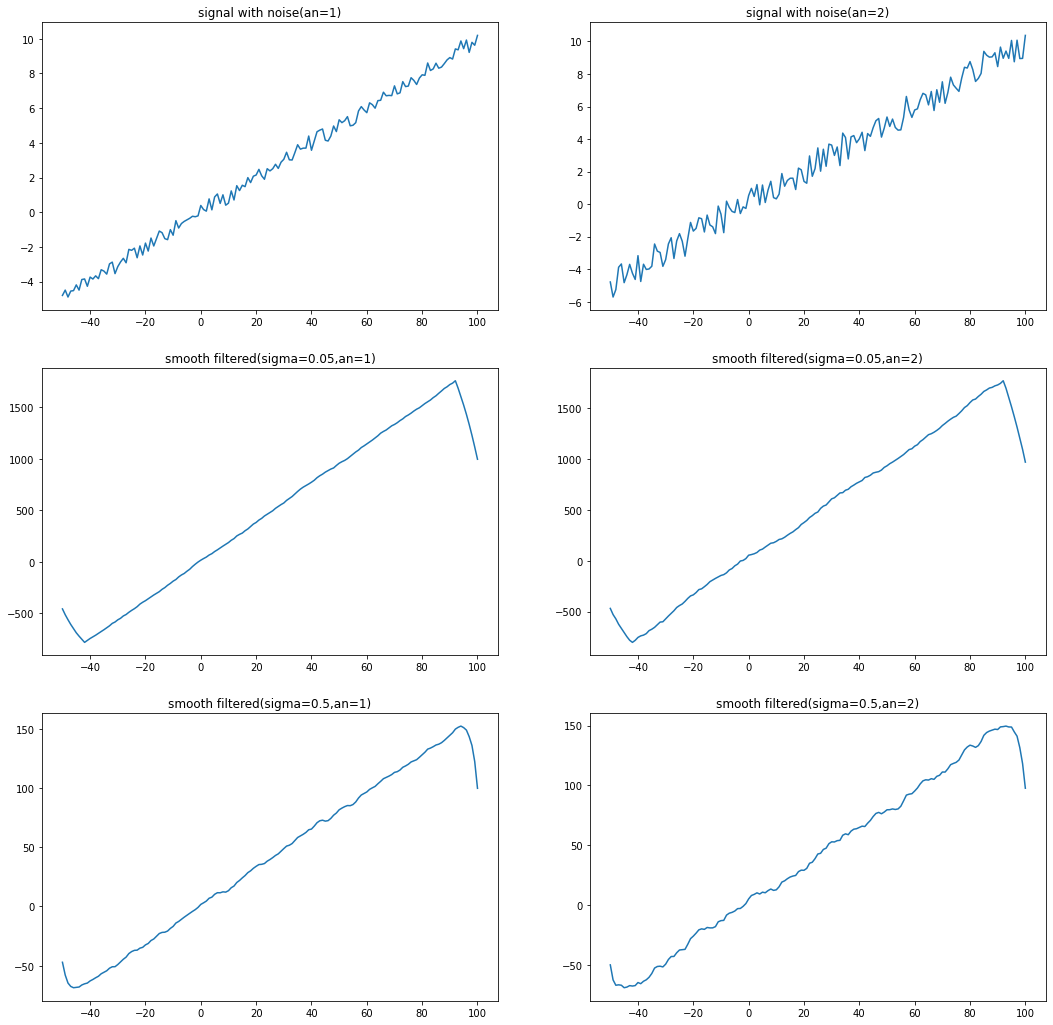

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#range of the signal
n = np.arange(-50,101,1)

#define noise
def noise(an):
    return an*(np.random.rand(151)-0.5)

#define smooth filter
def smooth(signal,sigma,L=8):
    h = np.exp(-sigma*abs(np.arange(-L,L+1,1)))
    h *= sum(h)
    return np.convolve(h,signal,'same')


x1 = 0.1*n + noise(1)
x2 = 0.1*n + noise(2)

plt.figure(num="smooth filter",figsize=(18,18))

plt.subplot(3,2,1)
plt.title("signal with noise(an=1)")
plt.plot(n,x1)

plt.subplot(3,2,2)
plt.title("signal with noise(an=2)")
plt.plot(n,x2)

plt.subplot(3,2,3)
plt.title("smooth filtered(sigma=0.05,an=1)")
plt.plot(n,smooth(x1,0.05))

plt.subplot(3,2,4)
plt.title("smooth filtered(sigma=0.05,an=2)")
plt.plot(n,smooth(x2,0.05))

plt.subplot(3,2,5)
plt.title("smooth filtered(sigma=0.5,an=1)")
plt.plot(n,smooth(x1,0.5))

plt.subplot(3,2,6)
plt.title("smooth filtered(sigma=0.5,an=2)")
plt.plot(n,smooth(x2,0.5))

